In [15]:
import numpy
from matplotlib import pyplot
from matplotlib import cm
from matplotlib.colors import Normalize
pyplot.rcParams.update({'figure.max_open_warning': 0})

In [16]:
nx = 41
ny = 41
dx = 2 / float(nx - 1)
dy = 2 / float(ny - 1)

In [17]:
u = numpy.ones((ny, nx))
v = numpy.ones((ny, nx))

In [18]:
sigma = .001
nu = 0.01
dt = sigma * dx * dy / nu

In [19]:
def equation_of_motion(u, v, dx, dy, dt, nu):
    # generate the next state as a function of the old state
    un = u.copy()
    vn = v.copy()
    u[1:-1, 1:-1] = (un[1:-1, 1:-1] - 
                     dt /dx * un[1:-1, 1:-1] * 
                     (un[1:-1, 1:-1] - un[1:-1, 0:-2]) - 
                     dt/dy *vn[1:-1, 1:-1] * 
                     (un[1:-1, 1:-1] - un[0:-2, 1:-1]) +
                     nu * dt / dx**2 *
                     (un[1:-1, 2:] -2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                     nu * dt /dy **2 *
                     (un[2:, 1:-1] -2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
    
    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] - 
                     dt / dx * un[1:-1, 1:-1] *
                     (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                     dt /dy * vn[1:-1, 1:-1] *
                     (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) +
                     nu * dt / dx **2 *
                     (vn[1:-1, 2:] -2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                     nu * dt / dy**2 *
                     (vn[2:, 1:-1] -2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1]))     
    return (u,v)

In [20]:
def boundary(u, v, nozzle_u, nozzle_v, nx, ny, t_step):
    u[0, :] = 0
    u[-1, :] = 0
    u[:, 0] = 0
    u[:, -1] = 0

    v[0, :] = 0
    v[-1, :] = 0
    v[:, 0] = 0
    v[:, -1] = 0

     # special nozzle BC
    u[ny//2-2:ny//2+2, 0] = nozzle_u[t_step]
    v[ny//2-2:ny//2+2, 0] = nozzle_v[t_step]

    return (u, v)

In [21]:
def simulate(f, u, v, dx, dy, dt, nu, nozzle_u, nozzle_v, nx, ny, steps):
    for i in range(steps):
        (u, v) = equation_of_motion(u, v, dx, dy, dt, nu)
        (u, v) = boundary(u, v, nozzle_u, nozzle_v, nx, ny, i)
    
    return (u, v)

In [24]:
nt = 2510 # the number of steps we’re simulating
f = None
###Assign initial conditions
initial_u = numpy.zeros((nx, ny))
initial_v = numpy.zeros((nx, ny))
### Special BC for nozzle
# located at (0, 1)
nozzle_u = numpy.append(10*numpy.ones(1000), numpy.zeros(nt))
nozzle_v = numpy.append(10*numpy.ones(1000), numpy.zeros(nt))
(final_u, final_v) = simulate(f, initial_u, initial_v, dx, dy, dt, nu, nozzle_u, nozzle_v, nx, ny, nt)

NameError: name 'i' is not defined

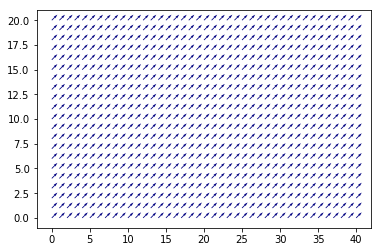

In [25]:
ax = pyplot.figure()
norm = Normalize()
magnitude = numpy.sqrt(u[::2]**2 + v[::2]**2)
pyplot.quiver(u[::2], v[::2], norm(magnitude), scale=60,
cmap=pyplot.cm.jet)
ax.savefig('frame'+str(i).zfill(5)+'.png',dpi=300)
ax.clear()